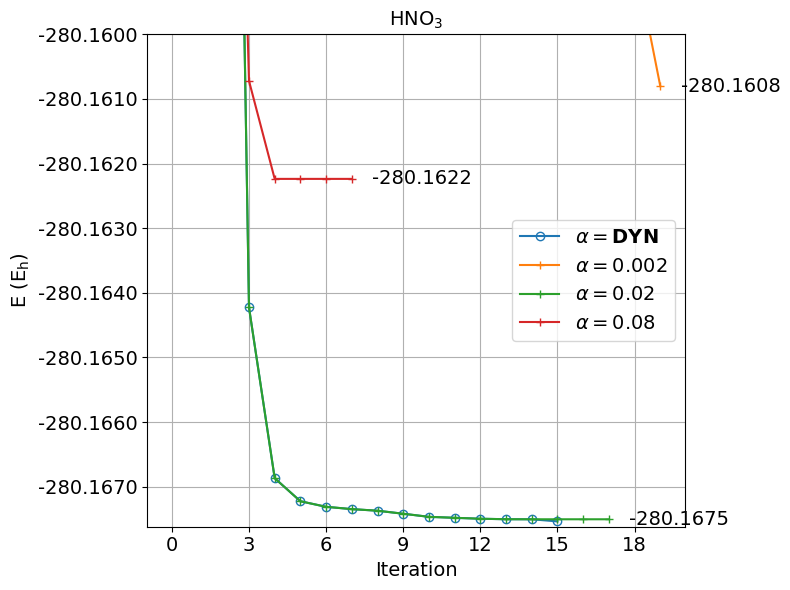

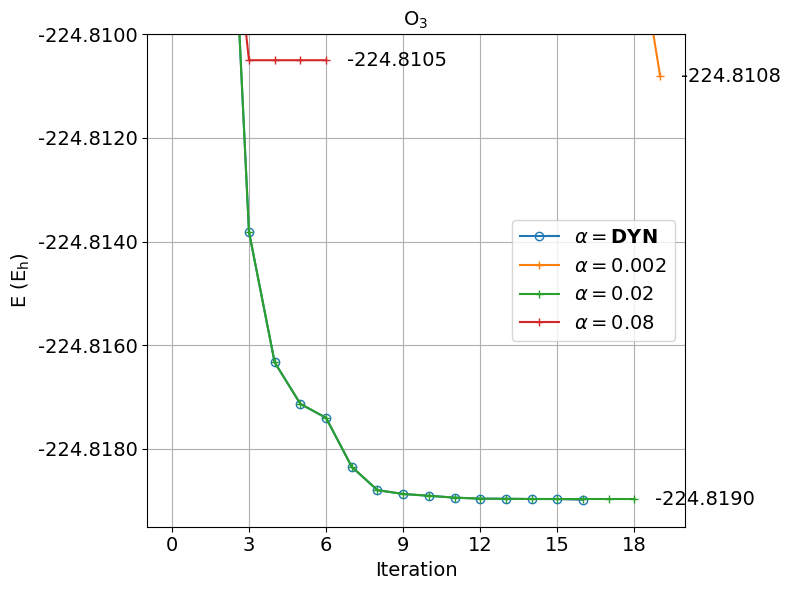

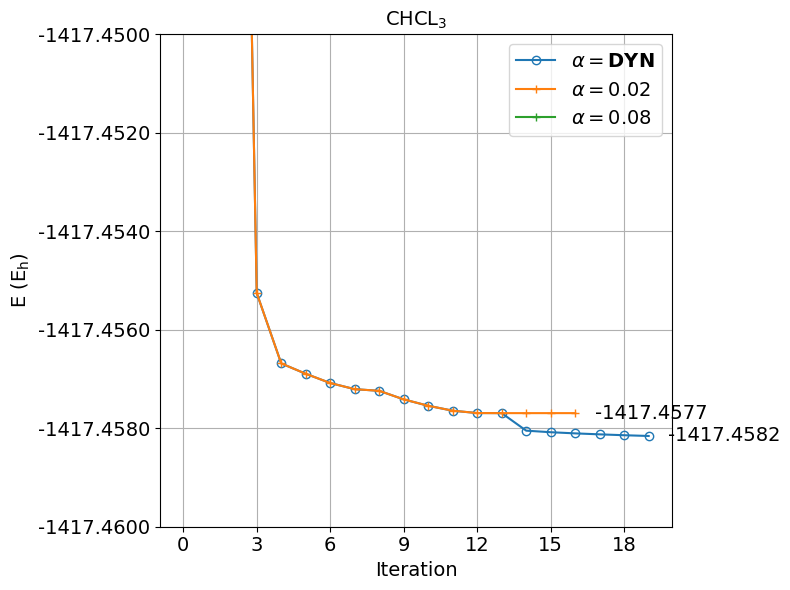

In [6]:
#This notebook plots the CO, HNO3 and BF3 convergence plots for different selected alphas
import csv
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator

import re

def format_molecule(name: str) -> str:
    # Sustitutes numbers by subindixes in LaTeX for molecule naming
    # ie H2O to H_2O
    return re.sub(r'(\d+)', r'$_{\1}$', name.upper())

molecule_list = ["HNO3","O3","CHCL3"]

#alpha_list = ["0.002","0.02"]

for molecule in molecule_list:
#Convert molecule name to latex format
    title_str = format_molecule(molecule)

    # Read the data
    data = defaultdict(list)  # alpha: list of (iteration, energy)

    with open(f"{molecule}_NOF.csv", mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            alpha = float(row['alpha'])
            iteration = int(row['iteration'])
            energy = float(row['energy'])
            data[alpha].append((iteration, energy))
    # Plot
    # colec data
    markers = ['o', '+', '+', '+', '+', '+', '*','^']

    plt.figure(figsize=(8, 6))
    plt.tick_params(axis='both', labelsize=14)

    if molecule == "CO2":
        # Zoom on y axis for CO2
        plt.ylim(-188.08355, -188.0822) # Range: 0.9 kcal approx
        alpha_to_show = (0.001, 0.04,0.08, 0.005)
    elif molecule == "BF3":
        # Zoom for BF3
        plt.ylim(-323.823, -323.812) # Range: 1.2 kcal approx
        alpha_to_show = (0.001, 0.002,0.005, 0.02, 0.04, 0.08)
    elif molecule == "HNO3":
        plt.ylim(-280.16762, -280.16)
        alpha_to_show = (0.002, 0.005, 0.08, 0.02)
    elif molecule == "O3":
        plt.ylim(-224.8195, -224.81)
        alpha_to_show = (0.08, 0.002, 0.02, 0.04)
    elif molecule == "CHCL3":
        plt.ylim(-1417.46, -1417.45)
        alpha_to_show = (0.002, 0.02,0.0)
        
    # Plot and optionally show label for selected alphas
    for i, (alpha, points) in enumerate(sorted(data.items())):
        iterations, energies = zip(*points)
        marker = markers[i % len(markers)]

        # Add label for dynamic alpha
        if alpha == 0.0:
            label = r'$\alpha = \bf{DYN}$'
        else:
            label = fr'$\alpha = {alpha}$'

        plt.plot(iterations, energies, marker=marker, markerfacecolor='none', label = label)

        #Plot the last energies for the selected alpha series (alpha_to_show)
        if any(np.isclose(alpha, a) for a in alpha_to_show):
            last_x = iterations[-1]
            last_y = energies[-1]
            plt.text(last_x + 0.8, last_y, f'{last_y:.4f}', fontsize=14, verticalalignment='center')
        
    # Labels and axis set up
    plt.xlabel('Iteration', fontsize=14)
    plt.ylabel(r'E (E$_{\mathrm{h}}$)', fontsize=14)  # recta

    plt.title(title_str, fontsize=14)
    plt.grid(True)

    plt.legend(fontsize=14) # show legen
        
    # Ticks Format 
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, _: f"{y:.4f}"))
    #
    plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

    #plt.legend(fontsize=14) # show legen

    plt.tight_layout()
    plt.savefig(f'{molecule}{"_NOF_zoom"}.png', dpi=300)
    plt.show()

